Imports and loadings

In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)

import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random

Mounted at drive


In [ ]:
%cd Projet
!ls

[Errno 2] No such file or directory: 'Projet'
/content/drive/MyDrive/SAM
Projet


In [ ]:
#path = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/SAM/Projet/data/msdi' # +'/scaledFeatures.npy'
path = '/content/drive/MyDrive/Colab Notebooks/Temps2/SAM/Projet/data/msdi'

# WILLIM PATH : '/content/drive/MyDrive/Projet/data/msdi' 
# ALICE PATH : /content/drive/MyDrive/Colab Notebooks/Temps2/SAM/Projet/data/msdi

##Visualisation

In [ ]:
# img = plt.imread(img_path)
# print(img.shape)

# plt.figure(figsize=(20,6))
# plt.imshow(img)

##Baseline images

Features utilisées : sous échantillonage

###Extraction features

Calculer des features sur chaque image, par exemple (au choix)
- sous-échantillonnage 3x3
- HOG 3x3



Coder soi-même le sous-échantillonnage 3x3 en comparant plusieurs solutions :
- sous-échantillonnage naïf (image[::p, ::q, :])
- moyenne sur chaque block (skimage.transform.downscale_local_mean)
- sous-échantillonnage propre (skimage.transform.resize
avec anti_aliasing=True)
- HOG : utiliser scikit-image (skimage.feature.hog)


#### Import data

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/SAM/Projet/data/msdi' # +'/scaledFeatures.npy'
# raw_imgs_path = path + '/img'
# filenames = os.listdir(path+ '/img')

def load_img(entry, msdi_path=path):
    '''
    Charge une image à partir d'une ligne du fichier central msdi_mapping
    '''
    return plt.imread(msdi_path +'/'+ entry['img'])


df = pd.read_csv(path+'/msdi_mapping.csv')
#TODO : set index as Unnamed:0
df.head(5)

,Unnamed: 0,msd_track_id,genre,album_index,set,msd_artist_id,image_url,img,mfcc,deep_features
0,0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,img/0000848744_200.jpg,mfcc/mfcc_A.npz,0
1,1,TRBLDQQ128F92E58B4,Rock,1,train,AR3RK011187FB3CE3B,http://artwork-cdn.7static.com/static/img/slee...,img/0000476534_200.jpg,mfcc/mfcc_B.npz,1
2,2,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,img/0000062345_200.jpg,mfcc/mfcc_D.npz,2
3,3,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,img/0000144785_200.jpg,mfcc/mfcc_J.npz,3
4,4,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,img/0000520513_200.jpg,mfcc/mfcc_J.npz,4


In [ ]:
df_mask=df['set']=='train'
df_train=df[df_mask]

nbTrainSamples = len(df_train)
nbTestSamples = len(df) - nbTrainSamples

Import Labels & Label encoding

In [ ]:
def get_label_list(msdi_path=path):
    df = pd.read_csv(msdi_path +'/'+ 'labels.csv', header=None)
    return list(df.iloc[:, 0])

labels_names = get_label_list()
print(labels_names)

['Blues', 'Country', 'Electronic', 'Folk', 'Jazz', 'Latin', 'Metal', 'New Age', 'Pop', 'Punk', 'Rap', 'Reggae', 'RnB', 'Rock', 'World']


In [ ]:
#https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
labelEncoder = LabelEncoder()
labelEncoder.fit(labels_names)

LabelEncoder()

In [ ]:
#Exemple
enc_labels = labelEncoder.transform(labels_names)
print(enc_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


####Creation X_train / X_test / Y_train / Y_test

In [ ]:
from skimage.transform import resize
def getSampleFeaturesAndLabel(row):
    #Lecture image
    img = load_img(entry=row)
    #Creation feature : sous échantillonage
    feat = resize(image=img, output_shape=(3,3), anti_aliasing=True,) #(3,3,3)
    feat_vect = feat.reshape(nbFeatures)                              #(27,)
    #Vérification à cause de problèmes avec valeurs aberrantes générées
    for j, value in enumerate(feat_vect): 
      if (value >255 | np.isnan(value)): feat_vect[j] = 255

    label_name = row['genre']
    label_idx = int(labelEncoder.transform([label_name]))
    
    return feat_vect, label_idx

In [ ]:
nbFeatures = 3*3*3
X_train = np.empty((nbTrainSamples, nbFeatures))
train_labels = np.empty(nbTrainSamples)

X_test = np.empty((nbTestSamples, nbFeatures))
test_labels = np.empty(nbTestSamples)

idx_train = 0
idx_test = 0
for i in df.index: #TODO augmenter
  if i%500 ==0 : print(f"{i} / {len(df)}")
  row = df.iloc[i,:]
  if row['set']=='train':
    feat, label_idx = getSampleFeaturesAndLabel(row)
    X_train[idx_train] = feat
    train_labels[idx_train] = label_idx
    idx_train +=1

  elif row['set']=='test':
    feat, label_idx = getSampleFeaturesAndLabel(row)
    X_test[idx_test] = feat
    test_labels[idx_test] = label_idx
    idx_test +=1

0 / 30712
500 / 30712
1000 / 30712
1500 / 30712
2000 / 30712
2500 / 30712
3000 / 30712
3500 / 30712
4000 / 30712
4500 / 30712
5000 / 30712
5500 / 30712
6000 / 30712
6500 / 30712
7000 / 30712
7500 / 30712
8000 / 30712
8500 / 30712
9000 / 30712
9500 / 30712
10000 / 30712
10500 / 30712
11000 / 30712
11500 / 30712
12000 / 30712
12500 / 30712
13000 / 30712
13500 / 30712
14000 / 30712
14500 / 30712
15000 / 30712
15500 / 30712
16000 / 30712
16500 / 30712
17000 / 30712
17500 / 30712
18000 / 30712
18500 / 30712
19000 / 30712
19500 / 30712
20000 / 30712
20500 / 30712
21000 / 30712
21500 / 30712
22000 / 30712
22500 / 30712
23000 / 30712
23500 / 30712
24000 / 30712
24500 / 30712
25000 / 30712
25500 / 30712
26000 / 30712
26500 / 30712
27000 / 30712
27500 / 30712
28000 / 30712
28500 / 30712
29000 / 30712
29500 / 30712
30000 / 30712
30500 / 30712


Normalisation des features

In [ ]:
from sklearn.preprocessing import StandardScaler #gaussien centré-réduit
scaler = StandardScaler(copy=False)

#Normalisation des features
# print("max feat value :", np.max(X_train))
scaled_train_features = scaler.fit_transform(X_train)
scaled_test_features = scaler.transform(X_test)
# print("max feat value :", np.max(X_train))
print(scaled_train_features.shape)
print(scaled_test_features.shape)

(21383, 27)
(9329, 27)


Enregistrement des features

NE PLUS LE FAIRE CAR DEJA FAIT (ET C'EST LONG)

In [ ]:
#Enregistrement des features 
# np.savez(path+'/'+'scaled_img_features.npz', \
#          X_train=scaled_train_features, \
#          Y_train=train_labels, \
#          X_test=scaled_test_features, \
#          Y_test=test_labels)

####Visualisation

img/0000848744_200.jpg (200, 200, 3)


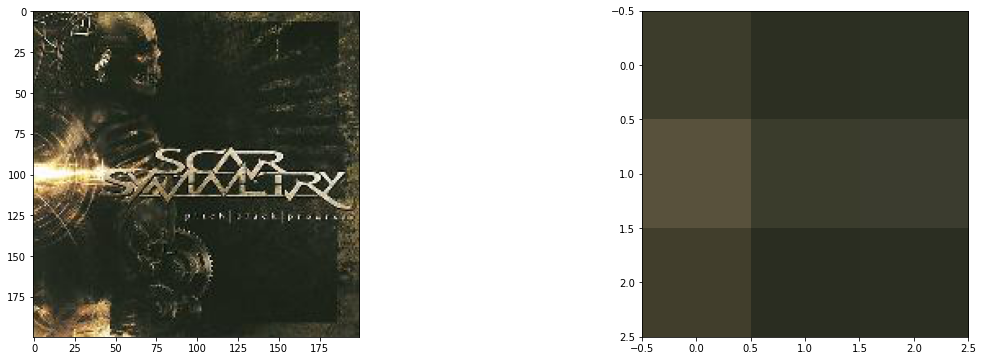

In [ ]:
from skimage.transform import resize
# X = plt.imread(raw_imgs_path+'/'+filenames[0])
X = load_img(entry= df.iloc[0,:])
print(df.iloc[0,:]['img'], X.shape)
# print(X[:5,:5])

plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.imshow(X)
plt.grid(False)

plt.subplot(122)
sub_img = resize(image=X, output_shape=(3,3), anti_aliasing=True,)
plt.imshow(sub_img)
plt.grid(False)

# print(sub_img)

###Import données

In [ ]:
path = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/SAM/Projet/data/msdi'
trainData = np.load(path+'/'+'scaled_img_features.npz')
print(trainData.files)

X_train = trainData['X_train']
train_labels_idx = trainData['Y_train']
X_test = trainData['X_test']
test_labels_idx = trainData['Y_test']

print(X_train.shape)
print(train_labels_idx.shape)
print(X_test.shape)
print(test_labels_idx.shape)

['X_train', 'Y_train', 'X_test', 'Y_test']
(21383, 27)
(21383,)
(9329, 27)
(9329,)


Y_train - One hot encoding

In [ ]:
from keras.utils import np_utils
# print(np.unique(train_labels_idx))  #TODO : problème ?????

#Convert integers to one hot encoded vectors
Y_train = np_utils.to_categorical(train_labels_idx)
Y_test = np_utils.to_categorical(test_labels_idx)
print(train_labels_idx[0],Y_train[0])

6.0 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print("shape x : ", X_train.shape)
print("shape y : ", Y_train.shape)

shape x :  (21383, 27)
shape y :  (21383, 15)


###Modèle

> Utiliser un classifieur de votre choix (SVM / Decision Tree / Logistic Regression)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
number_of_classes = 15
number_of_features = 27 #X_train.shape[1]

#Définition model - Logistic Regression
model = Sequential()
model.add(Dense(number_of_classes,activation = 'softmax',input_dim = number_of_features))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###Entrainement

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_train, Y_train))

Epoch 1/20
669/669 [==============================] - 10s 14ms/step - loss: 2.6718 - accuracy: 0.1301 - val_loss: 2.5314 - val_accuracy: 0.1580
Epoch 2/20
669/669 [==============================] - 7s 10ms/step - loss: 2.4863 - accuracy: 0.1602 - val_loss: 2.4530 - val_accuracy: 0.1712
Epoch 3/20
669/669 [==============================] - 7s 10ms/step - loss: 2.4412 - accuracy: 0.1702 - val_loss: 2.4263 - val_accuracy: 0.1740
Epoch 4/20
669/669 [==============================] - 9s 13ms/step - loss: 2.4245 - accuracy: 0.1714 - val_loss: 2.4166 - val_accuracy: 0.1746
Epoch 5/20
669/669 [==============================] - 7s 11ms/step - loss: 2.4165 - accuracy: 0.1747 - val_loss: 2.4105 - val_accuracy: 0.1748
Epoch 6/20
669/669 [==============================] - 7s 11ms/step - loss: 2.4124 - accuracy: 0.1765 - val_loss: 2.4066 - val_accuracy: 0.1773
Epoch 7/20
669/669 [==============================] - 6s 10ms/step - loss: 2.4083 - accuracy: 0.1790 - val_loss: 2.4047 - val_accuracy: 0.181

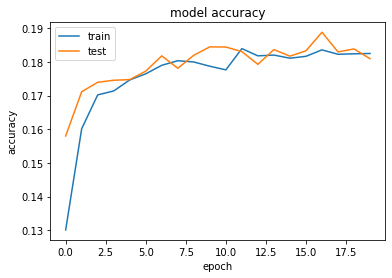

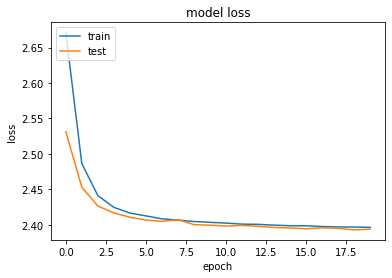

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Evaluation

In [ ]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test)
print("Loss : ", loss)
print("Accuracy : ", accuracy)

292/292 [==============================] - 1s 3ms/step - loss: 2.8732 - accuracy: 0.0890
Loss :  2.8732492923736572
Accuracy :  0.0889698788523674


In [ ]:
from sklearn.metrics import roc_auc_score
Y_predict = model.predict(X_test)
score = roc_auc_score(Y_test, Y_predict)
print("ROC AUC score : ", score)

ROC AUC score :  0.5993644326921623


##Classifieur profond sur les images

###Import data

Données en sortie : 
- df_train (répartition uniformisée)
- df_test
- df_test_uni  (répartition uniformisée)

In [ ]:
import pandas as pd

df = pd.read_csv(path+'/msdi_mapping.csv')
#TODO : set index as Unnamed:0
# df.head(5)

In [ ]:
df_mask=df['set']=='train'
df_train=df[df_mask]

df_mask=df['set']=='test'
df_test=df[df_mask]

nbTrainSamples = len(df_train)
nbTestSamples = len(df_test)

print('nbTrainSamples : ', nbTrainSamples)
print('nbTestSamples : ', nbTestSamples)

nbTrainSamples :  21383
nbTestSamples :  4649


####Import Labels & Label encoding

In [ ]:
def get_label_list(msdi_path=path):
    df = pd.read_csv(msdi_path +'/'+ 'labels.csv', header=None)
    return list(df.iloc[:, 0])

labels_names = get_label_list()
nbClasses = len(labels_names)
print(labels_names)
print("nombre labels : ", nbClasses)

['Blues', 'Country', 'Electronic', 'Folk', 'Jazz', 'Latin', 'Metal', 'New Age', 'Pop', 'Punk', 'Rap', 'Reggae', 'RnB', 'Rock', 'World']
nombre labels :  15


In [ ]:
#https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
labelEncoder = LabelEncoder()
labelEncoder.fit(labels_names)

LabelEncoder()

In [ ]:
#Exemple
enc_labels = labelEncoder.transform(labels_names)
print(enc_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


####Analyse répartition des données 

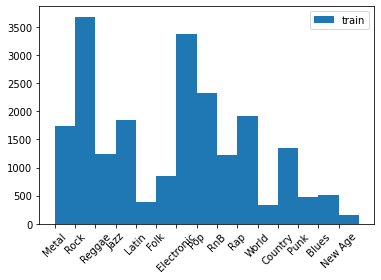

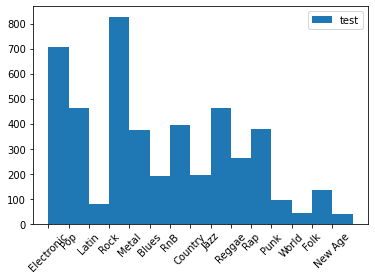

In [ ]:
plt.figure(1)
plt.hist(df_train['genre'], bins=np.arange(nbClasses+1), label='train')
plt.xticks(rotation=45)
plt.legend()


plt.figure(2)
plt.hist(df_test['genre'], bins=np.arange(nbClasses+1), label='test') #min 45
plt.xticks(rotation=45)
plt.legend()

####Uniformisation du nombre de classes dans le dataset d'entrainement

4 approches possible:
- **down sampling** : uniformiser la représentativité des classes par rapport à la classe minoritaire (suppression des exemples majoritaires)
- **"mean sampling"** : uniformiser la représentativité des classes par rapport à la moyenne de la représentativité des classes (suppression des exemples majoritaires + duplication des exemples minoritaires)
- **up sampling** : uniformiser la représentativité des classes par rapport à la classe majoritaire (duplication des exemples minoritaires)

In [ ]:
approaches = ['down sampling', 'mean sampling', 'up sampling']
approach_id = 2   # = 0, 1, 2

print(f"You selectd the {approaches[approach_id]} approach")

You selectd the up sampling approach


In [ ]:
def getMinMaxMoyRepresentativity(df):
  #Compute average
  counts = np.zeros(nbClasses)

  for i in df.index:
    label = df['genre'][i]
    labelId = labelEncoder.transform([label])[0]
    counts[labelId] +=1

  max = np.max(counts)
  moy = np.mean(counts)
  min = np.min(counts)

  #print('moy :', moy)
  return min, moy, max

Sampling

In [ ]:
n_samples_train = getMinMaxMoyRepresentativity(df_train)[approach_id]
n_samples_test = getMinMaxMoyRepresentativity(df_test)[approach_id]

#df_train = sklearn.utils.resample(df_train, replace=True, n_samples=n_samples_train)
#df_test_uni = sklearn.utils.resample(df_test, replace=True, n_samples=n_samples_train)  #For test prediction purpose only (see if impact on predictions diversity)

In [ ]:
from sklearn.utils import resample
#if approach_id == 0 or approach_id == 1:

def resampling(df):
  """Over sampling only"""
  
  majority_class = df['genre'].value_counts().idxmax()
  print("majority class examples", df['genre'].value_counts().max())

  # Creating balanced dataset
  df_resampled = pd.DataFrame()
  for genre in pd.unique(df['genre']):
      if genre == majority_class:
          df_resampled = pd.concat([df_resampled, df[df['genre'] == genre]], axis=0)
      else:
          resampling = resample(df[df['genre'] == genre],
                                replace=True, # sample with replacement
                                n_samples=df['genre'].value_counts().max(),    # to match majority class
                                random_state=0)
          df_resampled = pd.concat([df_resampled, resampling], axis=0)

  df_resampled = df_resampled.reset_index(drop=True)

  return df_resampled



def resampling2(df, nb_samples=None):

  counts = np.zeros(nbClasses)
  df_created = df.copy

  for n, i in enumerate(df_created.index):
    if n%1000 == 0: print(n,'/',nbTrainSamples)

    label = df_created['genre'][i]
    labelId = labelEncoder.transform([label])[0]

    if counts[labelId] >= nb_samples:
      df_created = df_created.drop(i)
    else: 
      counts[labelId] +=1

  # Duplicate minority class samples if necessary
  if np.min(counts) < nb_samples:
    #index = len(df_created)
    for class_id in range(nbClasses):
      if random[class_id] < nb_samples:
        nb_to_add = nb_samples - random[class_id]

        mask = df['genre'] == labelEncoder.inverse_transform([class_id])[0]
        df_class = df[mask]
        #indexes_class = df_class.index
        indexes_to_add = random.choices(sequence=df_class.index, k=nb_to_add)

        #df=df.append(dfNew,ignore_index=True)
        for i in indexes_to_add:
          df_created.append(df.iloc[indexes_to_add[i]])

        #df.loc[index]=[ 'Apple', 14, 'Yes' ]
        #index+=1

  return df_created

In [ ]:
df_train = resampling(df_train)
df_test_uni = resampling(df_test)

majority class examples 3678
majority class examples 827


#####Results

Train samples available :  55170
Test samples available :  4649
Uniformized Test samples available :  12405



(array([827., 827., 827., 827., 827., 827., 827., 827., 827., 827., 827.,
        827., 827., 827., 827.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

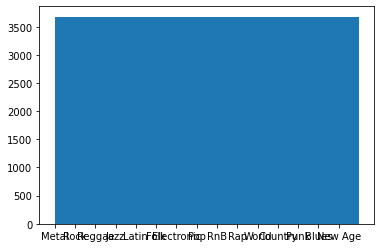

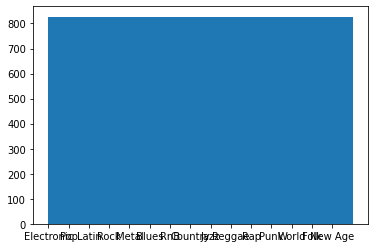

In [ ]:
nbTrainSamples = len(df_train)
nbTestSamples = len(df_test)
nbUniformizedTestSamples = len(df_test_uni)

print('Train samples available : ', nbTrainSamples)
print('Test samples available : ', nbTestSamples)
print('Uniformized Test samples available : ', nbUniformizedTestSamples)
print()

plt.figure()
plt.hist(df_train['genre'], bins=np.arange(nbClasses+1))
plt.figure()
plt.hist(df_test_uni['genre'], bins=np.arange(nbClasses+1))

###Préprocessing

- Choix du modèle à utiliser
- Aprentissage / load scaler for images
- Définition méthodes de génération par batchs qui implémentent toutes les étapes de préprocess

In [ ]:
modelId = 0 # 0 : CNN | 1 : ResNet

shapes = [(200, 200, 3), (224,224,3)]
imgShape = shapes[modelId]

In [ ]:
from tensorflow.keras.preprocessing import image

def getResizedImage(row): #AndLabel
    '''
    Charge une image à partir de son nom
    Reshape l'image pour fit l'entrée de ResNet en 224x224
    '''
    img_name = row['img']
    img_path = path +'/'+img_name
    img = image.load_img(img_path, target_size=(imgShape[0], imgShape[1]))

    # label_name = row['genre']
    # label_idx = int(labelEncoder.transform([label_name]))

    return np.array(img)#, label_idx

####Apprentissage du scaler 
> A ne pas refaire car scaler sauvegardé désormais

>apprentissage sur l'ensemble du dataset pour plus de représentativité

Stockage des données en mémoire

In [ ]:
# #4000 #nbTrainSamples
# reducedNbSamples = 4000 #Limitation pour ne pas overfit la RAM : stockage X_train + flatten_X_train + deep_sacler
# X_fit = np.empty((reducedNbSamples, imgShape[0] * imgShape[1] * imgShape[2])) #flatten pour shape scaler.fit
# indexs = df_train.index[:reducedNbSamples]

# for i in range(reducedNbSamples):
#   row_idx = indexs[i]
#   if i%500 ==0 : print(f"{i} / {reducedNbSamples}")
#   X_fit[i] = getResizedImage(df.iloc[row_idx,:]).reshape(1,imgShape[0]*imgShape[1]*imgShape[2])

Fit scaler

In [ ]:
from sklearn.preprocessing import StandardScaler #gaussien centré-réduit
scaler_deep = StandardScaler(copy=False)

# print(X_fit.shape)

In [ ]:
# scaler_deep.fit(X_fit)

Sauvegarde scaler

In [ ]:
from joblib import dump
print('imgShape[0] : ', imgShape[0])

# dump(scaler_deep, path+'/out_img/'+f'deepScaler-Images{imgShape[0]}.z')

imgShape[0] :  200


####Méthodes de génération par batch

Chargement du scaler entrainé

In [ ]:
from joblib import load
scaler = load(path+'/out_img/'+f'deepScaler-Images{imgShape[0]}.z')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Data Loader

In [ ]:
from keras.utils import np_utils

def getResizedImageAndLabel(row):
    '''
    Charge une image à partir de son nom
    Reshape l'image pour fit l'entrée du modèle
    '''
    img_name = row['img']
    img_path = path +'/'+img_name
    img = image.load_img(img_path, target_size=(imgShape[0], imgShape[1]))

    label_name = row['genre']
    label_idx = int(labelEncoder.transform([label_name]))
    # hot_enc_label = np_utils.to_categorical([label_idx], num_classes=15)

    return img, label_idx

img, label_idx = getResizedImageAndLabel(df_train.iloc[40])
# plt.imshow(img)
print(label_idx)

6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5, 200, 200, 3)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


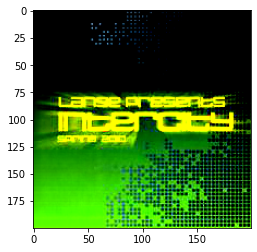

In [ ]:
def load_data(df_batch, batch_size): #set_indices
    """
    Import *batch_size* vocalizations from files and stock them into variables
    """

    X_batch=np.empty((batch_size, imgShape[0], imgShape[1], imgShape[2]))
    batch_labels=np.empty(batch_size)

    #Chargement des labels et features
    for j in range(len(df_batch.index)) :
      feat, label_idx = getResizedImageAndLabel(df_batch.iloc[j,:])
      X_batch[j] = feat
      batch_labels[j] = int(label_idx)
      # print(label_idx)
    
    #Hot encoding labels
    # print("batch_labels",batch_labels)
    Y_batch = np_utils.to_categorical(batch_labels, num_classes=15)
    # print("Y_batch",Y_batch)
    
    #Normalisation des features du batch :
    X_batch = scaler.transform(X_batch.reshape((batch_size, imgShape[0] * imgShape[1] * imgShape[2]))) \
                    .reshape((batch_size, imgShape[0], imgShape[1], imgShape[2])) 
    
    return X_batch, Y_batch

imgs, labels = load_data(df_test.head(5), 5)
print(imgs.shape)
plt.imshow(imgs[0])
print(labels[0])

Générateur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


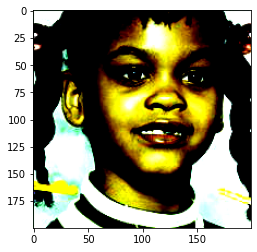

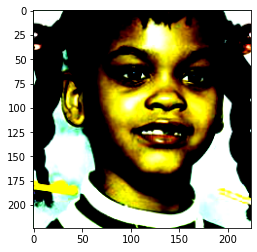

In [ ]:
from sklearn.utils import shuffle
def get_batch(mode, batch_size, shuffleDataset=True):
    if mode=='train' : 
      nbdata = len(df_train.index)
      df = df_train.copy()
    elif mode=='test': 
      nbdata = len(df_test.index)
      df = df_test.copy()
    elif mode=='test_uni': 
      nbdata = len(df_test_uni.index)
      df = df_test_uni.copy()

    if shuffleDataset : df = shuffle(df).reset_index(drop=True)
    else : df.reset_index(drop=True)

    i = 0
    while True:
      i += batch_size
      if i+batch_size > nbdata: i = 0
      
      # df_batch = pd.read_csv('df.csv', skiprows=i*batch_size, nrows=batch_size)
      df_batch=df.iloc[i*batch_size : (i+1)*batch_size]
      res = load_data(df_batch=df_batch, batch_size=batch_size)
      yield res


data_generator_test = get_batch('test', 50)
x, y = next(data_generator_test)
# print(y[0])
plt.figure(0)
plt.imshow(x[0])

from skimage.transform import resize
plt.figure(1)
plt.imshow(resize(x[0], (224, 224,3)))

###Définition modèle & Entrainement

#### Création modèle

In [ ]:
def CNNBasedClassifier():
  from tensorflow.keras.models import Model, Sequential
  from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten
  from tensorflow.keras import optimizers

  model = Sequential(name="CNNClassifier")

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', input_shape = imgShape))
  model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(nbClasses, activation='softmax'))

  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


def ResNetBasedClassifier():
  from tensorflow.keras.applications.resnet50 import ResNet50
  from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
  from tensorflow.keras.models import Model, Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras import optimizers

  resnet = ResNet50(weights='imagenet')
  resnet.trainable = True  #on choisit de finetuner ResNet en même temps que le classifieur 
  # resnet.summary()

  clf = Sequential(name="classifieur")
  clf.add(Dense(2*nbClasses, activation='relu'))
  clf.add(Dense(nbClasses, activation='softmax', input_shape=resnet.output_shape))

  model = Model(inputs=resnet.input, outputs=clf(resnet.output), name="ResNetClassifier")
  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model



if modelId == 0:
  model = CNNBasedClassifier()
  print("Model CNN created")
elif modelId == 1:
  model = ResNetBasedClassifier()
  print("Model ResNet created")

model.summary()

Model CNN created
Model: "CNNClassifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 67, 67, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 67, 67, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 67, 67, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                   

####Entrainement

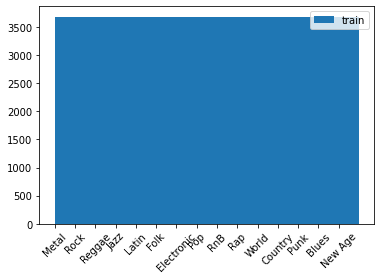

In [ ]:
plt.hist(df_train['genre'], bins=np.arange(nbClasses+1), label='train')
# plt.hist(df_test['genre'], bins=np.arange(nbClasses+1), label='test') #min 38
plt.xticks(rotation=45)
plt.legend()

In [ ]:
nb_epoch = 90
batch_size =50  #Ne pas mettre plus sinon risque erreurs numériques lors du chargement dynamique des données
print(f'Training on {nbTrainSamples} samples')

data_generator_train = get_batch('train', batch_size)
data_generator_test = get_batch('test', batch_size)

Training on 55170 samples


In [ ]:
from tqdm import tqdm

def fit(nb_epoch, batch_size, callback_patience=5):
  earlystopping_err = 0
  nbBatches = int(nbTrainSamples/batch_size)
  loss_history = []
  val_loss_history = []
  val_acc_history = []

  #Val acc callback
  x, y = next(data_generator_test)
  best_val_acc = getAccuracy(x, y)

  print("Training started")

  for epoch in tqdm(range(nb_epoch)):    
      Loss = []

      for batch in range(nbBatches):
          x, y = next(data_generator_train) # x = current batch
          current_loss = model.train_on_batch(x, y) # train_on_batch allows you to expressly update weights based on a collection of samples you provide, without regard to any fixed batch size.
          Loss.append(current_loss)
      
      #Affichage loss à chaque itération : prévention divergence
      x, y = next(data_generator_test)
      epoch_loss = np.mean(Loss)
      # val_acc = getAccuracy(x, y)
      val_score = model.test_on_batch(x,y)
      print( f"Epoch: {epoch+1}/{nb_epoch}  |  Loss: {epoch_loss}  |  Validation loss: {val_score[0]} |  Validation acc: {val_score[1]}")

      #Sauvegarde de statistiques pour affichage ultérieur
      loss_history.append(epoch_loss)
      val_acc_history.append(val_score[1])  #val_acc
      val_loss_history.append(val_score[0]) #val_loss


      # EarlyStopping - Validation loss
      # if val_loss > np.min(val_loss_history[-callback_patience:]): 
      #   earlystopping_err +=1
      # else : earlystopping_err = 0

      # EarlyStopping - Validation accuracy
      if val_score[1] < best_val_acc:   #val_acc
        earlystopping_err +=1
      else : 
        best_val_acc = val_score[1] #val_acc
        earlystopping_err = 0

      if earlystopping_err == callback_patience :
          print(f"Early Stopping at epoch n°{epoch}: Validation accuracy kept decreasing after {callback_patience} epochs delay") #loss / increasing
          break
      
  print("Training finished")
  return loss_history, val_loss_history, val_acc_history


def getAccuracy(x, y):
    true_count = 0
    y_pred = model.predict(x)
    for i in range(len(y)):
      if np.argmax(y[i]) == np.argmax(y_pred[i]):
        true_count +=1
    return true_count/len(y)

In [ ]:
#Callback : Early stopping # lancer ça !
patience = 5

loss_history, val_loss_history, val_acc_history = fit(nb_epoch, batch_size, patience)

Evolution du loss

In [ ]:
start_idx = 1
plt.plot(np.arange(start_idx, len(loss_history)), loss_history[start_idx:])
plt.plot(np.arange(start_idx, len(val_loss_history)), val_loss_history[start_idx:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', ' validation'], loc='upper left')#, 'test'
plt.show()

Sauvegarde du modèle

In [ ]:
# path_drive_william = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/SAM/Projet' # my path

if modelId == 0:
  model.save(path+'/out_img/cnn_model_images.h5') 
elif modelId == 1:
  model.save(path+'/out_img/resnet_model_images.h5')

###Evaluation

Load saved model

In [ ]:
# path_drive_william = '/content/drive/MyDrive/CENTRALE MARSEILLE/3A/SAM/Projet'
from tensorflow.keras.models import load_model

modelId_toEvaluate = 0  #modelId
imgShape = shapes[modelId_toEvaluate]
scaler = load(path+'/out_img/'+f'deepScaler-Images{imgShape[0]}.z')

if modelId_toEvaluate == 0:
  model = load_model(path+'/out_img/cnn_model_images.h5') #_model
  print("Model CNN loaded")
elif modelId_toEvaluate == 1:
  model = load_model(path+'/out_img/resnet_model_images.h5')
  print("Model ResNet loaded")

# model.summary()

NameError: ignored

Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

def getAccuracy(y_pred, y):  #Defined twice
    true_count = 0
    for i in range(len(y)):
      if np.argmax(y[i]) == np.argmax(y_pred[i]):
        true_count +=1
    return true_count/len(y)


def evaluate(model, mode, batch_size, shuffleDataset=True):
  assert mode in ['ROC', 'acc']

  print(f'Testing on {nbTestSamples} samples')
  nbBatches = int(nbTestSamples/batch_size)
  # data_generator_test = get_batch('test', batch_size, shuffleDataset=shuffleDataset)
  data_generator_test = get_batch('test_uni', batch_size, shuffleDataset=shuffleDataset)
  scores = []

  for batch in tqdm(range(nbBatches)):
      x, y_true = next(data_generator_test)
      
      if model == 'random':
        y_int_pred = np.random.randint(nbClasses, size=(batch_size,1))
        y_pred = np_utils.to_categorical(y_int_pred, num_classes=15)
      else :  
        y_pred = model.predict(x)

      if mode == 'acc':
        s = getAccuracy(y_pred, y_true)
      elif mode == 'ROC':
        # print(y_true.shape)
        # print(y_true[0])
        # print(y_pred.shape)
        # print(y_pred[0])

        # for i in range(len(y_true)):
        #   if len(np.unique(y_true[i])) != 2: print(y_true[i])

        s = roc_auc_score(y_true, y_pred, labels=enc_labels)   #TODO : ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.
        print(f'batch {batch}/{nbBatches} : s = {s}')

      scores.append(s)
  return np.mean(scores)

In [ ]:
#batch_size réduit à 30 au lieu de 50 car ça a l'air de faire buguer la fonction get batch qui renvoie que des classes "0" dans ce cas la ... (TODO comprendre pourquoi)

modelScore = evaluate(model=model, mode='acc', batch_size=50, shuffleDataset=True)

#Comparaison classifieur aléatoire
randomScore = evaluate(model='random', mode='acc', batch_size=50)

print()
print(f'model score = \t{modelScore}')
print(f'random score = \t{randomScore}')

Testing on 4649 samples


100%|██████████| 92/92 [00:17<00:00,  5.12it/s]


Testing on 4649 samples


100%|██████████| 92/92 [00:03<00:00, 25.70it/s]


model score = 	0.13521739130434784
random score = 	0.0634782608695652


In [ ]:
# data_generator_test = get_batch('test', batch_size=50)
# x, y_true = next(data_generator_test)

# loss = model.evaluate(x=x, y=y_true)
# print("Loss : ", loss)

# print("Accuracy : ", accuracy)  #Attente d'avoir un modèle compilé et sauvegardé avec metrics=['accuracy']

###Exhiber des exemples mal classés et essayer d’interpréter les erreurs

#####Visualisation d'un exemple mal classifié

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sample found was classified 8 instead of 4
Sample found was classified ['Pop'] instead of ['Jazz']


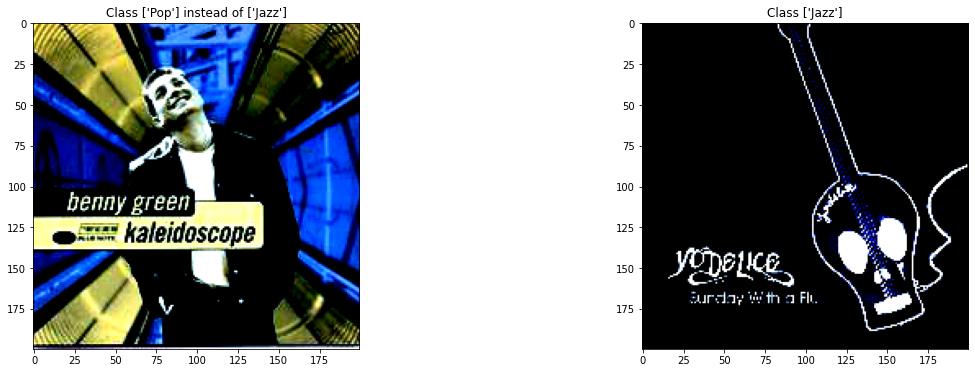

In [ ]:
batch_size = 30 
nbBatches = int(nbTestSamples/batch_size)
data_generator_test = get_batch('test', batch_size)


misclassified_sample = None
sample_same_class = None #Sample of the same class as the one predicted for the wrong example found

found = False #True when true example AND wrong example found
found_wrong_sample = False  #True when wrong example found
label_pred_wrong = None
label_true_wrong = None

while not found : 
  x, y_true = next(data_generator_test)
  Y_predict = model.predict(x)

  for i in range(batch_size):
    label_pred_idx = np.argmax(Y_predict[i])
    label_true_idx = np.argmax(y_true[i])

    if label_pred_idx != label_true_idx:  #Sample not well classified
      found_wrong_sample = True
      label_pred_wrong = label_pred_idx
      label_true_wrong = label_true_idx
      misclassified_sample = x[i]
    
    if label_pred_wrong == label_true_idx:
      found = True
      sample_same_class = x[i]

print(f'Sample found was classified {label_pred_wrong} instead of {label_true_wrong}')
print(f'Sample found was classified {labelEncoder.inverse_transform([label_pred_wrong])} instead of {labelEncoder.inverse_transform([label_true_wrong])}')

#Plots
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.title(f"Class {labelEncoder.inverse_transform([label_pred_wrong])} instead of {labelEncoder.inverse_transform([label_true_wrong])}")
plt.imshow(misclassified_sample)
plt.subplot(122)
plt.title(f"Class {labelEncoder.inverse_transform([label_true_wrong])}")
plt.imshow(sample_same_class)

**Note:** Si la cellule précédente ne fonctionne pas, il faut relancer les 2 précédentes

#####Quels sont les labels prédits par notre modèle ?

In [ ]:
label_predictions = []

for batch in range(nbBatches):
  x, y_true = next(data_generator_test)
  Y_predict = model.predict(x)
  label_pred_idxs = np.argmax(Y_predict, axis=1)
  # print(label_pred_idxs)

  label_predictions = np.concatenate((label_predictions,label_pred_idxs), axis=0)

label_predictions = np.array(label_predictions).astype(int)
predictions = labelEncoder.inverse_transform(label_predictions)

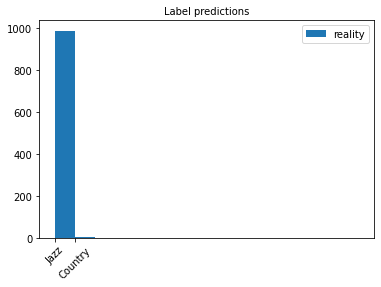

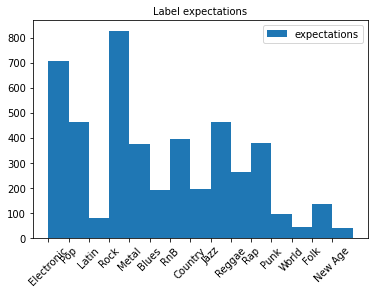

In [ ]:
plt.figure(0)
plt.hist(predictions, bins=np.arange(nbClasses+1), label='reality')
plt.xticks(rotation=45)
plt.title('Label predictions', fontsize=10)
plt.legend()


plt.figure(1)
plt.hist(df_test['genre'], bins=np.arange(nbClasses+1), label='expectations')
plt.title('Label expectations', fontsize=10)
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Problème :** Le modèle semble prédire unquement des examples de class Rock